In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv("dataset/dailyminimumtemperature.csv")

# Remove unwanted/empty column
df = df[['Date', 'Dailyminimumtemperatures']]

# Rename for simplicity
df.columns = ['Date', 'Temp']

# Remove non-date rows (e.g., header inside data)
df = df[df['Date'].str.contains(r'^\d{2}-\d{2}-\d{4}$', regex=True, na=False)]

# Convert Date column to datetime (DD-MM-YYYY)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Convert Temp column to float
df['Temp'] = pd.to_numeric(df['Temp'], errors='coerce')

# Drop NaNs (if any)
df.dropna(inplace=True)

# Set index
df.set_index('Date', inplace=True)

# Final preview
print(df.head())


            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


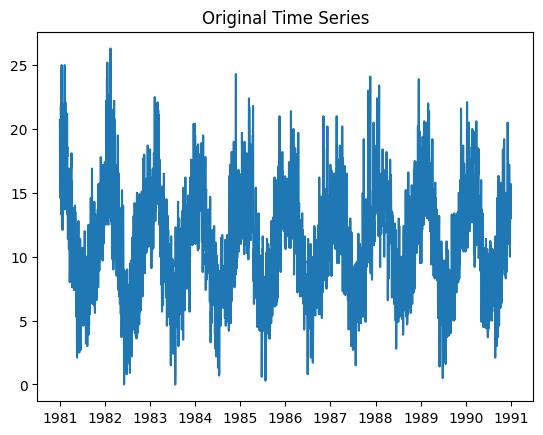

In [14]:
# Plot original series
plt.plot(df['Temp'])
plt.title("Original Time Series")
plt.show()

In [15]:
# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df['Temp'].values.reshape(-1, 1))

# Create sequences
def create_sequences(data, window_size=5):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_sequences(scaled_data, window_size)

# Split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [16]:
model = Sequential()
model.add(LSTM(64, activation='tanh', return_sequences=False, input_shape=(window_size, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

D:\aana\envs\dl_lab_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0677 - val_loss: 0.0106
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - val_loss: 0.0115
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - val_loss: 0.0101
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - val_loss: 0.0095
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - val_loss: 0.0095
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - val_loss: 0.0095
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - val_loss: 0.0091
Epoch 8/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - val_loss: 0.0089
Epoch 9/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - val_loss: 0.0089
Epoch 10/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - val_loss: 0.0090
Epoch 11/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - val_loss: 0.0083
Epoch 12/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - val_lo

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


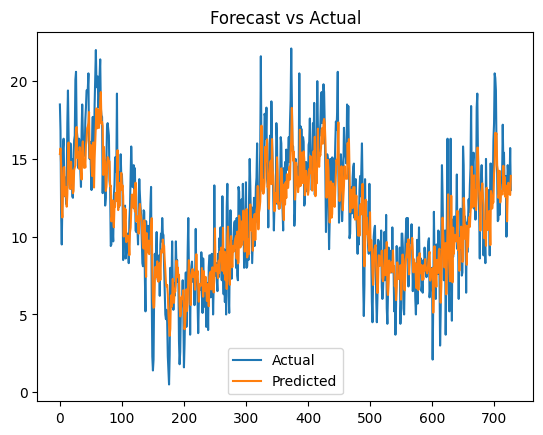

In [18]:
y_pred = model.predict(X_test)

# Inverse scale
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Plot results
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title("Forecast vs Actual")
plt.legend()
plt.show()